# Showcase of the numerical Gill model

This model is based on the works of Matsuno (1966) and Gill (1980). 3 prognostic variables $u$,$v$ and $p$ on a 2-dimensional spatial domain are integrated in time forced by a convective heating $Q$.

\begin{equation}
\frac{\partial u}{\partial t} + \epsilon u - \frac{1}{2} y v = - \frac{\partial p}{\partial x}
\\
\frac{\partial v}{\partial t} + \epsilon v + \frac{1}{2} y u = - \frac{\partial p}{\partial y}
\\
\frac{\partial p}{\partial t} + \epsilon p + \frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} = Q
\end{equation}

The prognostic variables can be interpreted as horizontal winds and column height in a shallow water model, or wind shear and layer thickness in a 2-layer model, or boundary layer winds and pressure and probably other interpretations. Read Matsuno (1966), Gill (1980), Neelin (1989) and others for more information. The model is non-dimensionalised, which can be done in different ways depending on the interpretation you choose to apply. Often the horizontal length scale is approximately 10 degrees and the timescale a couple of hours.  Note that here the sign of the forcing is reversed compared to Gill 1980, so that a postive heating induces a posive geopotential or layer thickness anomaly (in contrast to negative anomalies corresponding to a low pressure system at the surface). 

- Matsuno, Taroh. "Quasi-geostrophic motions in the equatorial area." Journal of the Meteorological Society of Japan. Ser. II 44.1 (1966): 25-43.
- Gill, Adrian E. "Some simple solutions for heat‐induced tropical circulation." Quarterly Journal of the Royal Meteorological Society 106.449 (1980): 447-462.
- Neelin, J. David. "On the interpretation of the Gill model." J. Atmos. Sci 46.15 (1989): 2466-2468.

## Usage
The idealised cases of convective heating are built into the `constructor` class. First you define a `constructor` that contains all the information about the grid, the timsteps and the forcing $Q$. Then you can a run a simulation with `solver` or `solver_converge` using the `constructor`, and specifying the model. Usually you probably want to use the `gill!` model, but there are some others to play around with (although some might not work or be unstable). Check out `../src/models.jl` for the models you can use. All the functions you will be using directly are in `../src/numerical_gill.jl`.



## Prepare packages etc.

All necessary packages should be installed if you have used `DrWatson` and activated the environment.
If not, in the `numerical_gill` working directory, do:

   ```
using Pkg
Pkg.activate(".")
Pkg.instantiate()
   ```

In [1]:
using DrWatson
@quickactivate "numerical_gill" # <- project name
using Pkg
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423
┌ Warning: Module JSON with build ID 599513140046724 is missing from the cache.
│ This may mean JSON [682c06a0-de6a-54ab-a142-c8b1cf79cde6] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80].
└ @ Base loading.jl:1124


Check installed packages:

In [2]:
Pkg.installed()

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg /home/k/k202066/.spack/stage/spack-stage-julia-1.7.0-wm6d6vykc4vcrytr3ytqe273umtmucdj/spack-src/usr/share/julia/stdlib/v1.7/Pkg/src/Pkg.jl:595


Dict{String, VersionNumber} with 6 entries:
  "DrWatson"          => v"2.9.1"
  "LoopVectorization" => v"0.12.104"
  "NetCDF"            => v"0.11.4"
  "Plots"             => v"1.27.5"
  "DistributedArrays" => v"0.6.6"
  "ClimateBase"       => v"0.16.0"

In [3]:
include("../src/numerical_gill.jl")

Q3 (generic function with 2 methods)

In [ ]:
projectdir()

In [ ]:
datadir()

## Symmetric Forcing

Make the constructor

In [4]:
N = 3000 # number of timesteps
Lx = 25 # length of x domain. Typically 1 length unit corresponds to 10 degrees longitude.
Ly = 5 # 1/2 length of the y domain. y domain goes from -5 to 5
Δt = 0.05 # timstep 
Δy = 0.5 # y-resolution
Δx = 0.5 # x-resolution

constructor_symmterical = construct(Lx,Ly,Δx,Δy,N,Δt,1); # the 1 at the end indicates the case for symmterical forcing (Gill 1980)


Solve

In [5]:
u_sym,v_sym,p_sym = solver(constructor_symmterical, gill!);

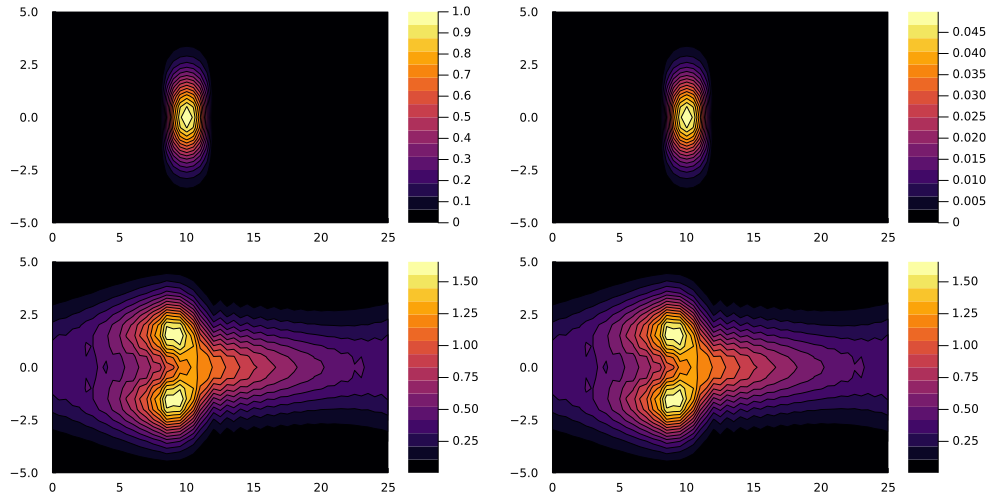

In [7]:
#pyplot(size=(1000,500))
xs = constructor_symmterical.xs
ys = constructor_symmterical.ys
N = constructor_symmterical.N

p0 = Plots.contour(xs, ys, transpose(constructor_symmterical.Q), fill = true, colorbar=true)
p1 = Plots.contour(xs, ys, transpose(p_sym[:,:,2]), fill = true, colorbar=true)
p2 = Plots.contour(xs, ys, transpose(p_sym[:,:,Int((end)/2)]), fill = true, colorbar=true)
p3 = Plots.contour(xs, ys, transpose(p_sym[:,:,end]), fill = true,colorbar=true)

Plots.plot(p0,p1, p2, p3,layout = (2, 2),size=(1000,500))
#plt.colorbar(h, ax=ax)

┌ Info: Saved animation to 
│   fn = /work/mh0066/m300577/numerical_gill/notebooks/tmp.gif
└ @ Plots /home/m/m300577/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/work/mh0066/m300577/numerical_gill/notebooks/tmp.gif")
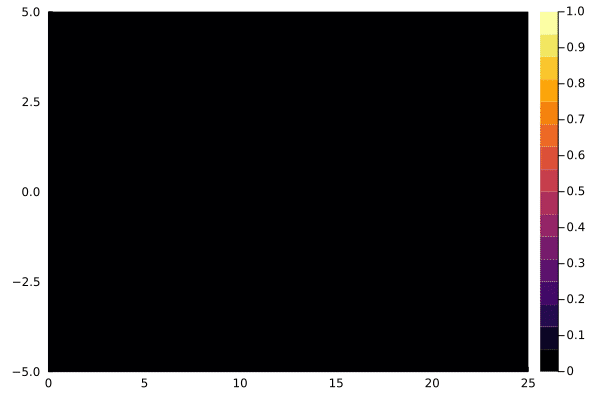

In [9]:
@gif for t in 1:length(p_sym[1,1,:])
    Plots.contour(xs, ys, transpose(p_sym[:,:,t]), fill = true, colorbar=true)
end every 10

You can also save the data as NETCDF file with the `saver()` function.

## Using `solver_converge():`
This will stop the simulation as soon as a certain threshold of convergence is reached. If not specified otherwise, it will only give you the last timestep.

In [11]:
u_sym,v_sym,p_sym = solver_converge(constructor_symmterical, gill!);

Simulated 1053 timesteps
  0.114098 seconds (31.17 k allocations: 114.920 MiB, 13.60% gc time, 12.57% compilation time)


## Change the dissipation:
Standard value is $\epsilon$ = 0.1 (Gill 1980), let's increase this by a factor of 5. This corresponds to a shorter dissipation timescale, which means the signal can travel less far before it dissipates.

In [12]:
u_sym_05,v_sym_05,p_sym_05 = solver_converge(constructor_symmterical, gill!,0.5,0.5,0.5);

Simulated 220 timesteps
  0.014597 seconds (2.89 k allocations: 23.759 MiB)


With stronger dissipation the simulation converges faster!

And the pattern is more localised

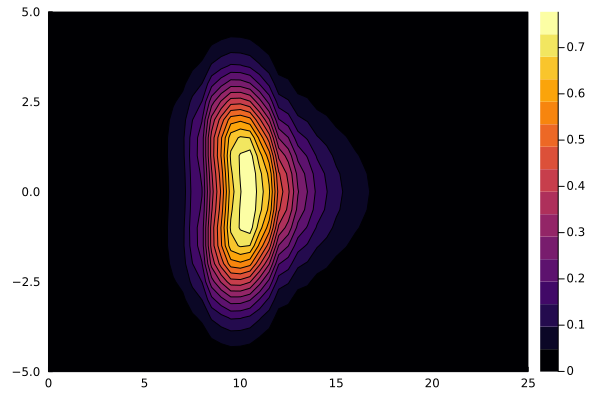

In [14]:
#pyplot(size=(1000,500))
xs = constructor_symmterical.xs
ys = constructor_symmterical.ys
N = constructor_symmterical.N

p = Plots.contour(xs, ys, transpose(p_sym_05), fill = true,colorbar=true)

